# How well do jobs and skills pay for data Analysts

**Methodology**

1. Evaluate median salary for top 5 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast
from datasets import load_dataset

#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
# filter for job country, job titles and drop nan
df_UK = df[(df['job_country']== 'United Kingdom')].dropna(subset=['salary_year_avg'])

In [12]:
job_titles = df_UK['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [22]:
df_UK_top5 = df_UK[df_UK['job_title_short'].isin(job_titles)]

In [33]:
job_order = df_UK_top5.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

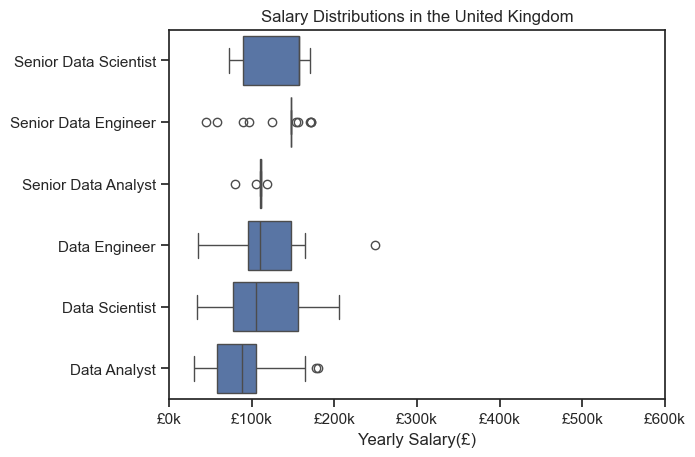

In [35]:
sns.boxplot(data=df_UK_top5, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distributions in the United Kingdom')
plt.xlabel('Yearly Salary(£)')
plt.ylabel('')
plt.xlim(0,600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'£{int(y/1000)}k')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()



# Investigate Median Salary Vs Skill for Data Analysts

In [40]:
df_DA_UK = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

df_DA_UK = df_DA_UK.dropna(subset=['salary_year_avg'])

In [44]:
df_DA_UK = df_DA_UK.explode('job_skills')

df_DA_UK[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
2602,51014.0,excel
2602,51014.0,word
2602,51014.0,outlook
16526,100500.0,sql
16526,100500.0,jupyter
...,...,...
771595,111175.0,sql
771595,111175.0,excel
771595,111175.0,sheets
771595,111175.0,looker


In [74]:
df_DA_top_pay = df_DA_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay.head(10)

,count,median
job_skills,,
pandas,1,177283.0
tensorflow,1,177283.0
numpy,1,177283.0
c++,1,177283.0
pytorch,1,177283.0
aurora,1,165000.0
mongodb,2,165000.0
mysql,3,165000.0
aws,3,165000.0


In [66]:
df_DA_skills = df_DA_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
tableau,13,100500.0
sql,33,98500.0
looker,6,96012.5
python,25,89100.0
power bi,7,89100.0
sas,8,80007.0
r,9,77017.5
excel,29,75550.0
go,9,71000.0


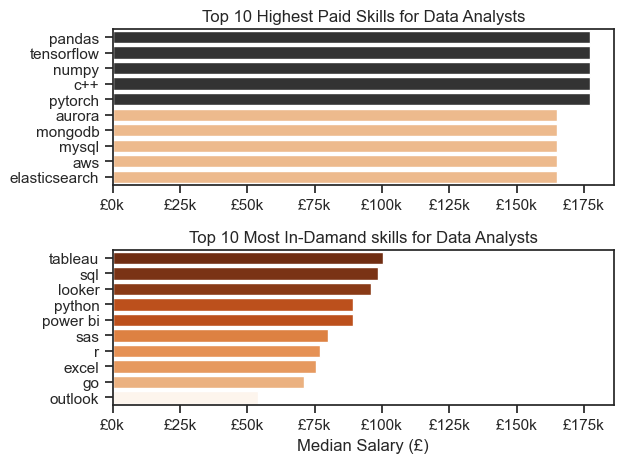

In [72]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style="ticks")

sns.barplot(data = df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='Oranges_d')
ax[0].legend().remove()
#df_DA_top_pay[::-1].plot(kind='barh', y='median',ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'£{int(x/1000)}k'))


sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='Oranges')
ax[1].legend().remove()
#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Damand skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (£)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'£{int(x/1000)}k'))

fig.tight_layout()